In [1]:
import pandas as pd
import json

In [2]:
import requests

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
# USA, Canada, Chile, Australia
# united-states, canada, chile, australia
# 2020-03-16 00:00:00
# 2020-12-02 00:00:00

start = "2020-03-16"
end = "2020-12-02"

In [4]:
covid = pd.DataFrame({
    "Date":pd.date_range(start="2020-03-16", end="2020-12-02", freq="d")
})

In [5]:
kolom_covid = ["united-states", "canada", "chile", "australia"]

for negara in kolom_covid:
    api = requests.get(f"https://api.covid19api.com/total/country/{negara}/status/confirmed?from={start}T00:00:00Z&to={end}T00:00:00Z")
    j = api.json()
    temp = pd.DataFrame.from_dict(j)
    temp['Date'] = temp['Date'].str.replace("T00:00:00Z", "")
    temp['Date'] = pd.to_datetime(temp.Date)
    covid = covid.merge(temp[['Date', 'Cases']], how='left', on='Date')
    covid.columns = covid.columns.str.replace('Cases', negara)

In [6]:
covid.columns = ['Date', 'covid-united-states', 'covid-canada', 'covid-chile', 'covid-australia']

In [7]:
dset = pd.read_excel("./traffic_per_negara_v2.xlsx")

In [8]:
dset.columns = ['Unnamed: 0', 'Date', 'traffic-australia', 'traffic-chile', 'traffic-canada', 'traffic-united-states']

In [9]:
dset = dset[['Date', 'traffic-australia', 'traffic-chile', 'traffic-canada', 'traffic-united-states']]

In [10]:
dset2 = pd.merge(dset, covid, how='left', on='Date')

In [11]:
dset3 = (dset2-dset2.min())/(dset2.max()-dset2.min())

In [12]:
import seaborn as sns

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

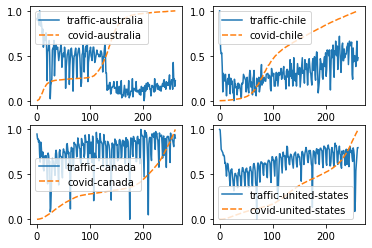

<Figure size 1080x576 with 0 Axes>

In [18]:
fig, axs = plt.subplots(2, 2)

sns.lineplot(ax=axs[0, 0],data=dset3[['traffic-australia', 'covid-australia']])
sns.lineplot(ax=axs[0, 1],data=dset3[['traffic-chile', 'covid-chile']])
sns.lineplot(ax=axs[1, 0],data=dset3[['traffic-canada', 'covid-canada']])
sns.lineplot(ax=axs[1, 1],data=dset3[['traffic-united-states', 'covid-united-states']])

plt.figure(figsize=(15,8))
plt.show()

In [19]:
import numpy as np

In [20]:
print('australia\t',      np.corrcoef(dset3['traffic-australia'].to_numpy().astype('float32'), dset3['covid-australia'].to_numpy().astype('float32'))[1,0])
print('chile\t\t',         np.corrcoef(dset3['traffic-chile'].to_numpy().astype('float32'), dset3['covid-chile'].to_numpy().astype('float32'))[1,0])
print('canada\t\t',        np.corrcoef(dset3['traffic-canada'].to_numpy().astype('float32'), dset3['covid-canada'].to_numpy().astype('float32'))[1,0])
print('united-states\t', np.corrcoef(dset3['traffic-united-states'].to_numpy().astype('float32'), dset3['covid-united-states'].to_numpy().astype('float32'))[1,0])

australia	 -0.8423600318630997
chile		 0.5976487402301455
canada		 0.3574602565259419
united-states	 0.3825695313285889


In [21]:
dset2.to_excel('traffic_dan_covid_negara.xlsx')